In [1]:
!pip install scikit-plot

###**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import scikitplot as skplt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

###**Import your dataset**

In [3]:
#reading the .xlsx dataset in to the dataframe
df = pd.read_excel("AIDA-Dataset.xlsx")

###**Data preprossesing**

In [4]:
short_names_mapping = {
    'Do you want to participate in this survey?': 'Participation',
    'Please state your age? (e.g. 25)': 'Age',
    'What is your gender?': 'Gender',
    'What degree are you currently pursuing?': 'Degree',
    'What is your current academic year? (e.g. 2)': 'AcademicYear',
    'Which medium of school have you come from?': 'SchoolMedium',
    'Which department do you study in?': 'Department',
    'What is your current cumulative grade points average (CGPA)?': 'CGPA',
    'Do you have any personal history of depression?': 'DepressionHistory',
    'What is your current relationship status?': 'RelationshipStatus',
    'What is your religion?': 'Religion',
    'What is your current place of residence?': 'Residence',
    'Currently I live - ': 'CurrentLocation',
    'Number of siblings (e.g. 2)': 'SiblingsCount',
    'What is your ordinal position/birth order among your siblings? (e.g. 1)': 'SiblingOrder',
    ' [I feel that I have additional responsibility to be in this position.]': 'ResponsibilityFeeling',
    'What is your father’s occupation? (If you do not see the occupation listed below or in case of a deceased father please choose the "other" option.)': 'FatherOccupation',
    'What is your mother’s occupation? (If you do not see the occupation listed below or in case of a deceased mother please choose the "other" option.)': 'MotherOccupation',
    'What is your family’s (household) average monthly income? (e.g. 2000)': 'FamilyIncome',
    'Do you have any financial hardship currently?': 'FinancialHardship',
    'Is your family financially dependent on you?': 'FinancialDependency',
    'Do you have anyone in your family who has been suffering from fatal diseases?': 'FamilyIllness',
    ' [How often do you communicate with your parents?]': 'ParentalCommunicationFrequency',
    'Give your opinion about these: [My parents are very strict about my daily life style]': 'ParentalStrictness',
    'Give your opinion about these: [My parents give pressure for my academic subject selection]': 'ParentalAcademicPressure',
    'Give your opinion about these: [My parents give pressure for my marriage.]': 'ParentalMarriagePressure',
    'Give your opinion about these: [My parents give pressure for my career choice.]': 'ParentalCareerPressure',
    'Give your opinion about these: [My parents give pressure regarding my decision on studying abroad]': 'ParentalStudyAbroadPressure',
    'Give your opinion about these statements [I have bad understanding with my parents]': 'ParentalUnderstanding',
    'Give your opinion about these statements [I have bad bonding with my siblings]': 'SiblingBonding',
    'Give your opinion about these statements [My  parents have unstable relationship]': 'ParentalRelationshipStability',
    'Give your opinion about these statements [I don’t get along with most of my classmates/friends]': 'PeerRelationship',
    'Give your opinion about these statements [My university teachers are unsupportive]': 'TeacherSupport',
    'Give your opinion about these statements [An unstable relationship with my partner affects my life.]': 'PartnerRelationshipImpact',
    'Give your opinion about these statements [A discouraging working environment (colleague/boss) affects the output of my work.]': 'WorkEnvironmentImpact',
    ' [I feel society interferes with my freedom of expression (freedom of speech / movement / etc...)]': 'SocietalInterference',
    'Have you ever experienced this sort of violence before? [I have faced Physical Violence before. (someone uses his/her body part or an object to control my actions) (শারিরিকনির্যাতন)]': 'PhysicalViolenceExperience',
    'Have you ever experienced this sort of violence before? [I have faced Sexual Violence before. (i am/was forced to unwillingly take part in sexual activity) (যৌনসহিংসতা)]': 'SexualViolenceExperience',
    'Have you ever experienced this sort of violence before? [I have faced Verbal Violence before. (someone uses language, whether spoken or written as an abusing tool against me) (মৌখিকগালি)]': 'VerbalViolenceExperience',
    'Have you ever experienced this sort of violence before? [I have faced Emotional Violence before. (someone says or does something to make me feel stupid or worthless) (মানসিকহিংসা)]': 'EmotionalViolenceExperience',
    'What kind of institution do you study in?': 'InstitutionType',
    'Self-perception on Academic status: [My academic performance is very poor.]': 'PoorAcademicPerformanceSelfPerception',
    'Self-perception on Academic status: [I have been criticized for my academic result.]': 'AcademicCriticismSelfPerception',
    'Self-perception on Academic status: [I am unsatisfied with my academic workload (i.e., presentations, assignments, tutorials)]': 'UnsatisfiedAcademicWorkloadSelfPerception',
    'Give your opinion for these: [I am not studying in my subject of interest.]': 'NonInterestSubjectOpinion',
    'Give your opinion for these: [I am unhappy with the subject that I am studying.]': 'UnhappySubjectOpinion',
    'Give your opinion for these: [I am not studying in the institution of my interest.]': 'NonInterestInstitutionOpinion',
    'Give your opinion for these: [I am unhappy with the institution that I am studying.]': 'UnhappyInstitutionOpinion',
    'Did you select the subject due to career prospects only?': 'CareerProspectsSubjectSelection',
    'What is your current employment status?': 'EmploymentStatus',
    'Which of the following is true for you?': 'PersonalSituation',
    'How the pandemic is affecting your full time /part time job/tutoring?': 'PandemicImpactOnWork',
    'I am satisfied with my current job.': 'JobSatisfaction',
    'My family/partner is satisfied with my current job.': 'FamilyPartnerJobSatisfaction',
    ' [In my opinion, enough jobs are not available related to my pursued subject. (your academic subject )]': 'InsufficientJobsSubjectOpinion',
    'How many close friends (approximately) do you have? (e.g. 3)': 'CloseFriendsCount',
    ' [How often do you hang out with your friends?]': 'FriendHangoutFrequency',
    'Are you involved in any extracurricular activities?': 'ExtracurricularInvolvement',
    'How strongly do you agree with each of the following questions: [How often do you smoke?]': 'SmokingFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you take drugs?]': 'DrugUseFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you drink alcohol?]': 'AlcoholConsumptionFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you engage in physical exercise?]': 'PhysicalExerciseFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you practice religious activities?]': 'ReligiousActivitiesFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you play video games?]': 'VideoGamePlayingFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you play sports?]': 'SportsPlayingFrequencyPerception',
    'On average how many hours do you spend in social media? (e.g. 5)': 'SocialMediaUsageHours',
    'Give your opinion on these: [The success stories of my peers in social media sometimes pose negative impact on me]': 'PeerSuccessImpactOnSocialMediaOpinion',
    'Give your opinion on these: [Social media has negative influence on my purchase decision]': 'SocialMediaInfluenceOnPurchaseDecisionOpinion',
    "Give your opinion on these: [I find human bonding less trust-worthy because it's easy to become imposters on social media]": 'TrustInHumanBondingOnSocialMediaOpinion',
    'Give your opinion on these: [I feel numbness of feelings as I am constantly seeing variety of incidents on social media.]': 'NumbnessFeelingsDueToSocialMediaOpinion',
    'Give your opinion on these: [I like to interact with my friends in person rather than in virtual mode.]': 'PreferenceForInPersonInteractionOpinion',
    'Sad': 'Sadness',
    'Depressed mood (sadness, hopeless, helpless, worthless)': 'DepressedMood',
    'Future': 'FutureOutlook',
    'Failure': 'FearOfFailure',
    'Satisfaction': 'SatisfactionLevel',
    'Guilty ': 'FeelingsOfGuilt',
    'Feelings of guiltiness ': 'GuiltFeelings',
    'Punished': 'FeelingsOfPunishment',
    'Disappointment ': 'FeelingsOfDisappointment',
    'Blame on me': 'SelfBlame',
    'Cry ': 'TendencyToCry',
    'Irritated': 'Irritability',
    'Interest in other people': 'InterestInOthers',
    'Decisions': 'DecisionMaking',
    'Look': 'AppearanceConcern',
    'Self-Care (This question is pertaining to what you feeling right now)': 'SelfCarePerception',
    'Energy Level:': 'EnergyLevel',
    'Work and Activities': 'WorkAndActivitiesLevel',
    'Sleep ': 'SleepQuality',
    'Sleeping Too Much:': 'ExcessiveSleeping',
    'Tired': 'Fatigue',
    'Appetite': 'AppetiteLevel',
    'a)\tAccording to you:': 'SubjectiveHealthPerception',
    'b)\tAccording to weekly measurements:': 'ObjectiveHealthPerception',
    'Feelings of suicide': 'SuicidalFeelings',
    'Retardation (প্রতিবন্ধকতা) (slowness of thought and speech, impaired ability to concentrate, decreased motor activity)/ (চিন্তা , কথা , মনোযোগ , মস্তিষ্কের কর্মক্ষমতা হ্রাস)': 'CognitiveRetardation',
    'Agitation (feeling of irritability or severe restlessness) (উত্কণ্ঠা)': 'Agitation',
    'Anxiety Psychic (মানসিক দুশ্চিন্তা)': 'PsychicAnxiety',
    ' [I felt that I was rather touchy/oversensitive over the past week]': 'SensitivityPerception',
    ' [I was aware of the action of my heart in the absence of physical exertion (e.g. sense of heart rate increase, heart missing a beat)]': 'HeartAwarenessPerception',
    'ANXIETY SOMATIC (দৈহিক) (physiological concomitants of anxiety) such as\ngastro-intestinal – dry mouth, wind, indigestion (বদ হজম), diarrhea, cramps ( পেটে ব্যাথা), belching( বমি)\ncardio-vascular – palpitations ( বুক ধড়ফড়) , headaches\nrespiratory – hyperventilation ( জোরে জোরে শ্বাস নেয়া), sighing urinary frequency sweating': 'SomaticAnxietySymptoms',
    'Somatic Symptoms Gastro-Intestinal': 'GastrointestinalSymptoms',
    'General Somatic Symptoms': 'GeneralSomaticSymptoms',
    'Genital Symptoms (symptoms such as loss of libido, menstrual disturbances)': 'GenitalSymptoms',
    'Hypochondriasis (The belief and fear of serious illness) / ( মরণব্যাধি আছে এমন ভ্রান্ত ধারনা )': 'Hypochondriasis',
    'Insight (self-perception)': 'SelfPerception',
}
df.rename(columns=short_names_mapping, inplace=True)


###**Feature Engineering**

In [5]:
# demographic_feature=['Age',
#  'Gender',
#  'Degree',
#  'SchoolMedium',
#  'CGPA']

In [6]:
# df_demography = df[demographic_feature]
# df_demography.head()

In [7]:
HDRS_scale = ['DepressedMood', 'FeelingsOfGuilt', 'SuicidalFeelings', 'SomaticAnxietySymptoms',
             'SleepQuality', 'WorkAndActivitiesLevel', 'CognitiveRetardation', 'Agitation',
             'PsychicAnxiety', 'GastrointestinalSymptoms', 'GeneralSomaticSymptoms',
             'Hypochondriasis', 'ObjectiveHealthPerception', 'SelfPerception']

In [8]:
# Iterate through the list and print unique values for each feature
for feature in HDRS_scale:
    if feature in df.columns:  # Check if the feature is in your DataFrame
        print(f"Unique values for {feature}: {df[feature].unique()}")
        print (" ")
    else:
        print(f"{feature} is not in the DataFrame")
        print("missing")
        print(" ")

Unique values for DepressedMood: ['Communicates feeling states non-verbally, i.e. through facial expression, posture, voice and tendency to weep. (বিভিন্ন অভিব্যক্তির মাধ্যমে অনুভূতি সমূহ প্রকাশ করে )'
 'Absent.'
 'Patient reports virtually only these feeling states in his/her spontaneous verbal and non-verbal communication. (মৌখিক ও অভিব্যক্তি উভয়ের মাধ্যমে অনুভূতি সমূহ ব্যক্ত করে)'
 'These feeling states indicated only on questioning. (শুধুমাত্র প্রশ্নকালীন সময়ে এসব অনুভূতি ব্যক্ত করে)'
 'These feeling states spontaneously reported verbally. (শুধু মৌখিকভাবে অনুভূতি সমূহ প্রকাশিত)']
 
Unique values for FeelingsOfGuilt: ['I feel guilty a good part of the time.'
 "I don't feel particularly guilty" 'I feel guilty all of the time.'
 'I feel quite guilty most of the time.']
 
Unique values for SuicidalFeelings: ['Absent.' 'Feels life is not worth living.(জীবন নিরর্থক মনে হওয়া)'
 'Wishes he/she were dead or any thoughts of possible death to self.(মৃত্যুর ইচ্ছা/চিন্তা)'
 'Attempts at suicide

In [9]:
df_scale = df

# Encoding for the HDRS scale features

# Depressed Mood
df_scale['DepressedMood'] = df['DepressedMood'].replace({
    'Absent.': 0,
    'These feeling states indicated only on questioning. (শুধুমাত্র প্রশ্নকালীন সময়ে এসব অনুভূতি ব্যক্ত করে)': 1,
    'These feeling states spontaneously reported verbally. (শুধু মৌখিকভাবে অনুভূতি সমূহ প্রকাশিত)': 2,
    'Communicates feeling states non-verbally, i.e. through facial expression, posture, voice and tendency to weep. (বিভিন্ন অভিব্যক্তির মাধ্যমে অনুভূতি সমূহ প্রকাশ করে )': 3,
    'Patient reports virtually only these feeling states in his/her spontaneous verbal and non-verbal communication. (মৌখিক ও অভিব্যক্তি উভয়ের মাধ্যমে অনুভূতি সমূহ ব্যক্ত করে)': 4
})
# FeelingsOfGuilt
df_scale['FeelingsOfGuilt'] = df['FeelingsOfGuilt'].replace({
    "I don't feel particularly guilty": 0,
    'I feel guilty a good part of the time.': 1,
    'I feel quite guilty most of the time.': 2,
    'I feel guilty all of the time.': 3
})


# Encoding for SuicidalFeelings
df_scale['SuicidalFeelings'] = df['SuicidalFeelings'].replace({
    'Absent.': 0,
    'Feels life is not worth living.(জীবন নিরর্থক মনে হওয়া)': 1,
    'Wishes he/she were dead or any thoughts of possible death to self.(মৃত্যুর ইচ্ছা/চিন্তা)': 2,
    'Ideas or gestures of suicide.(আত্মহত্যার ধারনা পোষণ করা)': 3,
    'Attempts at suicide.(আত্মহত্যার চেষ্টা)': 4
})

# SomaticAnxietySymptoms
df_scale['SomaticAnxietySymptoms'] = df['SomaticAnxietySymptoms'].replace({
    'Absent.': 0,
    'Mild.': 1,
    'Moderate.': 2,
    'Severe.': 3,
    'Incapacitating/ (অক্ষম)': 4
})

# SleepQuality
df_scale['SleepQuality'] = df['SleepQuality'].replace({
    "I don't sleep as well as I used to.": 1,
    'I can sleep as well as usual.': 0,
    'I wake up 1-2 hours earlier than usual and find it hard to get back to sleep.': 2,
    'I wake up several hours earlier than I used to and cannot get back to sleep.': 3
})

# Encoding for 'WorkAndActivitiesLevel'
df_scale['WorkAndActivitiesLevel'] = df['WorkAndActivitiesLevel'].replace({
    'Thoughts and feelings of incapacity, fatigue or weakness related to activities, work or hobbies. (দৈনিক কার্যাবলী অথবা শখের ব্যাপারে অক্ষমতা, দুর্বলতার মনভাব পোষণ)': 1,
    'No difficulty.': 0,
    'Loss of interest in activity, hobbies or work.': 2,
    'Decrease in actual time spent in activities or decrease in productivity (I do not spend at least three hours a day in activities (job or hobbies) excluding routine chores. (দৈনন্দিন কাজে সময় কম দেয়া, ৩ ঘণ্টা বা তারও কম সময় দৈনিক কাজে ব্যয় করা))': 3,
    'Stopped working because of present illness (I am engaged in no activities except routine chores, or I failed to perform routine chores unassisted. (অসুস্থতার কারনে দৈনিক কাজ থেকে পূর্ণ বিরতি , সাহায্য ছাড়া কোন কাজ না করতে পারা)': 4
})

# Cognitive Retardation
df_scale['CognitiveRetardation'] = df['CognitiveRetardation'].replace({
    'Normal speech and thought.(সাধারন কথা বা চিন্তায় প্রতিবন্ধকতা )': 0,
    'Slight retardation during the interview.( interview চলাকালীন কিছু প্রতিবন্ধকতার সম্মুখীন হওয়া)': 1,
    'Obvious retardation during the interview.( interview চলাকালীন আবশ্যিক প্রতিবন্ধকতার সম্মুখীন হওয়া)': 2,
    'Interview difficult.( Interview  কঠিন মনে হওয়া )': 3,
    'Complete stupor.(বাক্রুদ্ধ হয়ে যাওয়া)': 4
})
# Agitation
df_scale['Agitation'] = df['Agitation'].replace({
    'None.': 0,
    'Fidgetiness/ (অস্থিরতা)': 1,
    'Moving about, can’t sit still.': 2,
    'Playing with hands, hair, etc.': 3,
    'Hand wringing/(হাত মোচড়ানো), nail biting, hair-pulling, biting of lips.': 4
})

# Psychic Anxiety
df_scale['PsychicAnxiety'] = df['PsychicAnxiety'].replace({
    'No difficulty.': 0,
    'Worrying about minor matters. (ছোটখাট বিষয় নিয়ে দুশিন্তা)': 1,
    'Apprehensive attitude apparent in face or speech. (কথা ও চেহারায় শঙ্কিত মনভাব প্রকাশ)': 2,
    'Fears expressed without questioning. (প্রশ্নের সম্মুখীন না হলেও ভীতি প্রকাশ)': 3,
    'Subjective(depending on patient/subject) tension and irritability/(বিরক্তি )': 4
})

# GastrointestinalSymptoms
df_scale['GastrointestinalSymptoms'] = df['GastrointestinalSymptoms'].replace({
    'None.': 0,
    'Loss of appetite but eating without staff encouragement. Heavy feelings in abdomen.': 1,
    'Difficulty eating without staff urging. Requests or requires laxatives or medication for bowels or medication for gastro-intestinal symptoms.': 2
})

# GeneralSomaticSymptoms
df_scale['GeneralSomaticSymptoms'] = df['GeneralSomaticSymptoms'].replace({
    'None.': 0,
    'Heaviness in limbs, back or head. Backaches, headaches, muscle aches. Loss of energy and fatigability.': 1,
    'Any clear-cut symptom': 2
})

# Hypochondriasis
df_scale['Hypochondriasis'] = df['Hypochondriasis'].replace({
    'Not present.': 0,
    'Preoccupation (আচ্ছন্ন) with health': 1,
    'Self-absorption (bodily).': 2,
    'Hypochondriacal delusions.': 3,
    'Frequent complaints, requests for help, etc.': 4
})

# ObjectiveHealthPerception
df_scale['ObjectiveHealthPerception'] = df['ObjectiveHealthPerception'].replace({
    'Not assessed.': 0,
    'Less than half kg weight loss in week.': 1,
    'Greater than half kg weight loss in week.': 2,
    'Greater than 1 kg weight loss weight in week.': 3
})

# SelfPerception
df_scale['SelfPerception'] = df['SelfPerception'].replace({
    'Denies being ill at all.': 0,
    'Acknowledges being depressed and ill.': 1,
    'Acknowledges illness but attributes cause to bad food, climate, overwork, virus, need for rest, etc.': 2
})


df_scale.head()

,Participation,Age,Gender,Degree,AcademicYear,SchoolMedium,Department,CGPA,DepressionHistory,RelationshipStatus,...,Agitation,PsychicAnxiety,SensitivityPerception,HeartAwarenessPerception,SomaticAnxietySymptoms,GastrointestinalSymptoms,GeneralSomaticSymptoms,GenitalSymptoms,Hypochondriasis,SelfPerception
0,Yes,23,Female,Undergraduate,4,Bangla Medium,Mathematical/Engineering & Physical Sciences,3.38,No,Single,...,1,4,some of the time,not at all,0,0,0,Absent.,0,0
1,Yes,24,Female,Postgraduate,1,English Medium,Business & Economics Studies,3.08,Yes,Single,...,0,1,not at all,not at all,1,0,0,Absent.,0,0
2,Yes,24,Male,Undergraduate,4,Bangla Medium,Mathematical/Engineering & Physical Sciences,3.05,Yes,Prefer not to say,...,1,4,some of the time,a good part of time,0,0,1,Absent.,0,1
3,Yes,22,Male,Postgraduate,1,Bangla Medium,Mathematical/Engineering & Physical Sciences,3.82,Yes,Single,...,0,1,a good part of time,some of the time,1,0,0,Absent.,0,0
4,Yes,25,Male,Undergraduate,4,Bangla Medium,Business & Economics Studies,3.40,Yes,Single,...,2,4,some of the time,some of the time,1,1,1,Severe.,1,1


In [10]:
df_scale = df_scale.loc[:, ['DepressedMood', 'FeelingsOfGuilt', 'SuicidalFeelings', 'SomaticAnxietySymptoms',
             'SleepQuality', 'WorkAndActivitiesLevel', 'CognitiveRetardation', 'Agitation',
             'PsychicAnxiety', 'GastrointestinalSymptoms', 'GeneralSomaticSymptoms',
             'Hypochondriasis', 'ObjectiveHealthPerception', 'SelfPerception']]

In [11]:
df_scale.columns.tolist()

['DepressedMood',
 'FeelingsOfGuilt',
 'SuicidalFeelings',
 'SomaticAnxietySymptoms',
 'SleepQuality',
 'WorkAndActivitiesLevel',
 'CognitiveRetardation',
 'Agitation',
 'PsychicAnxiety',
 'GastrointestinalSymptoms',
 'GeneralSomaticSymptoms',
 'Hypochondriasis',
 'ObjectiveHealthPerception',
 'SelfPerception']

In [12]:
# Iterate through the list and print unique values for each feature
for feature in HDRS_scale:
    if feature in df.columns:  # Check if the feature is in your DataFrame
        print(f"Unique values for {feature}: {df[feature].unique()}")
        print (" ")
    else:
        print(f"{feature} is not in the DataFrame")
        print("missing")
        print(" ")

Unique values for DepressedMood: [3 0 4 1 2]
 
Unique values for FeelingsOfGuilt: [1 0 3 2]
 
Unique values for SuicidalFeelings: [0 1 2 4 3]
 
Unique values for SomaticAnxietySymptoms: [0 1 2 3 4]
 
Unique values for SleepQuality: [1 0 2 3]
 
Unique values for WorkAndActivitiesLevel: [1 0 2 3 4]
 
Unique values for CognitiveRetardation: [0 1 2 3 4]
 
Unique values for Agitation: [1 0 2 3 4]
 
Unique values for PsychicAnxiety: [4 1 0 3 2]
 
Unique values for GastrointestinalSymptoms: [0 1 2]
 
Unique values for GeneralSomaticSymptoms: [0 1 2]
 
Unique values for Hypochondriasis: [0 1 2 3 4]
 
Unique values for ObjectiveHealthPerception: [1 2 0 3]
 
Unique values for SelfPerception: [0 1 2]
 


In [13]:
df_scale.head()

,DepressedMood,FeelingsOfGuilt,SuicidalFeelings,SomaticAnxietySymptoms,SleepQuality,WorkAndActivitiesLevel,CognitiveRetardation,Agitation,PsychicAnxiety,GastrointestinalSymptoms,GeneralSomaticSymptoms,Hypochondriasis,ObjectiveHealthPerception,SelfPerception
0,3,1,0,0,1,1,0,1,4,0,0,0,1,0
1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
2,4,1,0,0,0,0,1,1,4,0,1,0,2,1
3,1,1,1,1,0,1,0,0,1,0,0,0,0,0
4,3,0,1,1,1,1,2,2,4,1,1,1,3,1


In [14]:
#printing total score
df_scale['TotalScore'] = df_scale[[col for col in df_scale.columns]].sum(axis=1)
df_scale.head()

,DepressedMood,FeelingsOfGuilt,SuicidalFeelings,SomaticAnxietySymptoms,SleepQuality,WorkAndActivitiesLevel,CognitiveRetardation,Agitation,PsychicAnxiety,GastrointestinalSymptoms,GeneralSomaticSymptoms,Hypochondriasis,ObjectiveHealthPerception,SelfPerception,TotalScore
0,3,1,0,0,1,1,0,1,4,0,0,0,1,0,12
1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,4
2,4,1,0,0,0,0,1,1,4,0,1,0,2,1,15
3,1,1,1,1,0,1,0,0,1,0,0,0,0,0,6
4,3,0,1,1,1,1,2,2,4,1,1,1,3,1,22


In [15]:
# Assign an empty list to store the ratings
depression_Level = []

for row in df_scale['TotalScore']:

    if row <= 7:
        depression_Level.append('Normal')

    elif row <= 16:
        depression_Level.append('Mild')

    elif row <= 23:
        depression_Level.append('Moderate')

    else:
        depression_Level.append('Severe')

# Assign the ratings list to a new column called 'DepressionLevel' in the 'df_scale' dataframe
df_scale['DepressionLevel'] = depression_Level

df_scale.drop(columns = 'TotalScore', inplace = True)
print(df_scale.shape)
df_scale.head()

(520, 15)


,DepressedMood,FeelingsOfGuilt,SuicidalFeelings,SomaticAnxietySymptoms,SleepQuality,WorkAndActivitiesLevel,CognitiveRetardation,Agitation,PsychicAnxiety,GastrointestinalSymptoms,GeneralSomaticSymptoms,Hypochondriasis,ObjectiveHealthPerception,SelfPerception,DepressionLevel
0,3,1,0,0,1,1,0,1,4,0,0,0,1,0,Mild
1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,Normal
2,4,1,0,0,0,0,1,1,4,0,1,0,2,1,Mild
3,1,1,1,1,0,1,0,0,1,0,0,0,0,0,Normal
4,3,0,1,1,1,1,2,2,4,1,1,1,3,1,Moderate


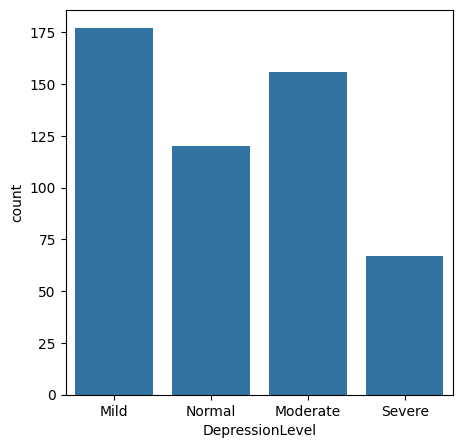

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5))
sns.countplot(x = df_scale['DepressionLevel'] )
plt.show()

In [17]:
# # One-hot encoding for nominal catagorical valuse in demograpy dataframe
# df_demo_encoded = pd.get_dummies(df_demography)
# df_demo_encoded.head()

In [18]:
# #merging both demographic features and scale features
# df_merged = pd.merge(df_demo_encoded, df_scale, left_index=True, right_index=True)
# df_merged.head()

In [19]:
# df_merged.shape

In [20]:
# Assign features (X) and target variable (y) || y = f(x)
X = df_scale.drop('DepressionLevel', axis=1)  # Features (all columns except 'Target column')
y = df_scale['DepressionLevel']  # Target variable ('Target' column)

###**Train Test Split** (No Need to change anthing from here)

In [21]:
# # Split dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

###**Feature Scalling**

In [22]:
# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### **Define 8 different classifiers**

In [23]:
# Defining classifiers with best hyperparameters
classifiers = {
    'KNN': KNeighborsClassifier(metric='euclidean', n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=1, min_samples_split=2),
    'Random Forest': RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=50),
    'Logistic Regression': LogisticRegression(C=1.0, solver='newton-cg'),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(C=10.0, degree=2, gamma=0.01, kernel='linear', probability=True),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1, n_estimators=200),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=1, loss='log_loss', max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
}

### **Train and evaluate classifiers**

In [24]:
# Store evaluation metrics
evaluation_metrics = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for name in classifiers.keys()}

initial_random_state = 0

# Train and evaluate classifiers with different random_state values
for random_state in range(0, 100):
    # Split dataset into train and test sets with current random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train and evaluate classifiers
    for name, clf in classifiers.items():
        # Train the classifier
        clf.fit(X_train, y_train)

        # Predict using the trained classifier
        y_pred = clf.predict(X_test)

        # Evaluate the classifier's performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Append evaluation metrics to the dictionary
        evaluation_metrics[name]['accuracy'].append(accuracy)
        evaluation_metrics[name]['precision'].append(precision)
        evaluation_metrics[name]['recall'].append(recall)
        evaluation_metrics[name]['f1'].append(f1)

# Print the evaluation metrics
for name, metrics in evaluation_metrics.items():
    print(f"-------------{name}:-------------")
    print(f"Mean Accuracy: {np.mean(metrics['accuracy']):.5f} ± {np.std(metrics['accuracy']):.5f}")
    print(f"Mean Precision: {np.mean(metrics['precision']):.5f} ± {np.std(metrics['precision']):.5f}")
    print(f"Mean Recall: {np.mean(metrics['recall']):.5f} ± {np.std(metrics['recall']):.5f}")
    print(f"Mean F1 Score: {np.mean(metrics['f1']):.5f} ± {np.std(metrics['f1']):.5f}")
    print()


-------------KNN:-------------
Mean Accuracy: 0.76269 ± 0.04100
Mean Precision: 0.76302 ± 0.04256
Mean Recall: 0.76599 ± 0.04415
Mean F1 Score: 0.75742 ± 0.04286

-------------Decision Tree:-------------
Mean Accuracy: 0.70433 ± 0.04128
Mean Precision: 0.69984 ± 0.04551
Mean Recall: 0.70142 ± 0.04744
Mean F1 Score: 0.69502 ± 0.04386

-------------Random Forest:-------------
Mean Accuracy: 0.81606 ± 0.04157
Mean Precision: 0.82705 ± 0.04365
Mean Recall: 0.79442 ± 0.04514
Mean F1 Score: 0.80196 ± 0.04382

-------------Logistic Regression:-------------
Mean Accuracy: 0.94760 ± 0.02297
Mean Precision: 0.95152 ± 0.02411
Mean Recall: 0.94911 ± 0.02366
Mean F1 Score: 0.94873 ± 0.02346

-------------Naive Bayes:-------------
Mean Accuracy: 0.76356 ± 0.03995
Mean Precision: 0.78930 ± 0.04330
Mean Recall: 0.74704 ± 0.04501
Mean F1 Score: 0.75831 ± 0.04243

-------------SVM:-------------
Mean Accuracy: 0.97798 ± 0.01552
Mean Precision: 0.97512 ± 0.01835
Mean Recall: 0.97588 ± 0.01779
Mean F1 Scor

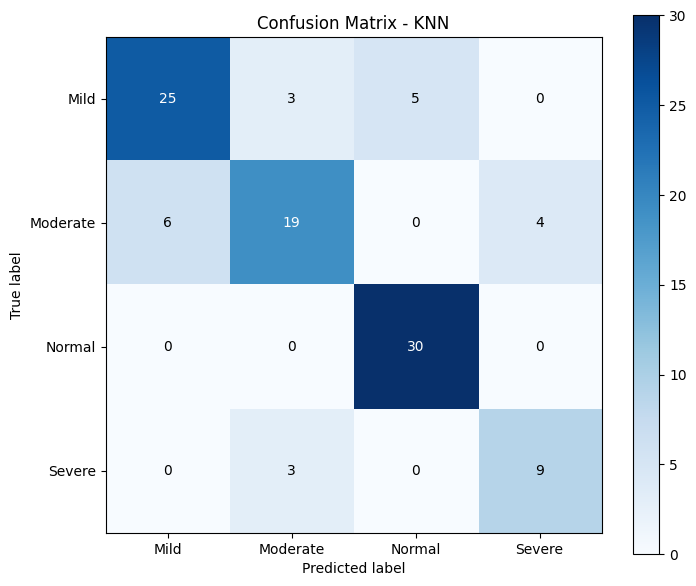

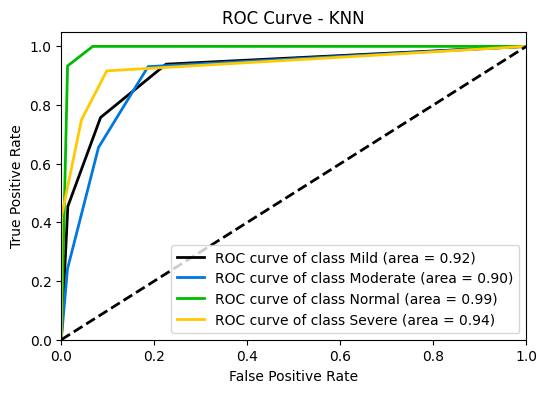

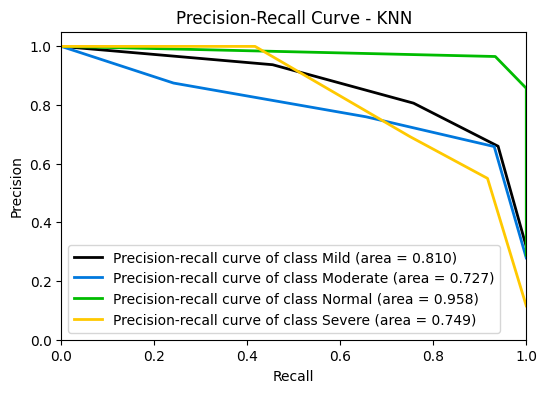

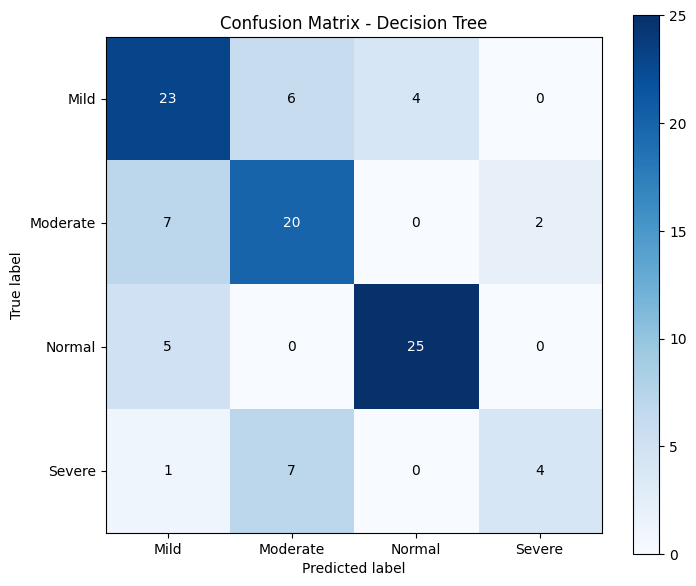

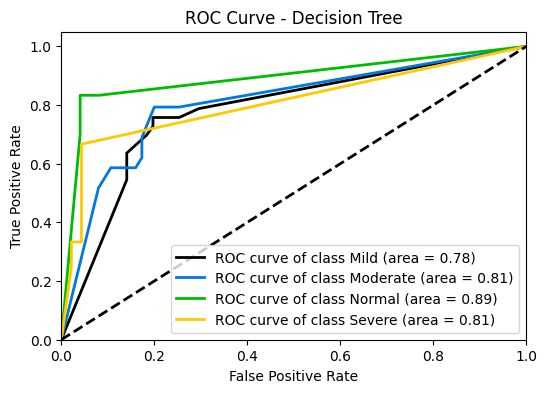

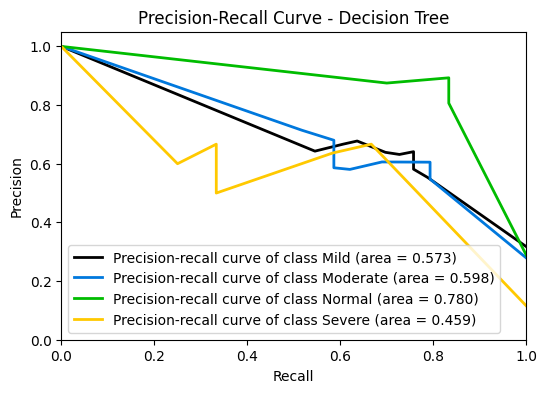

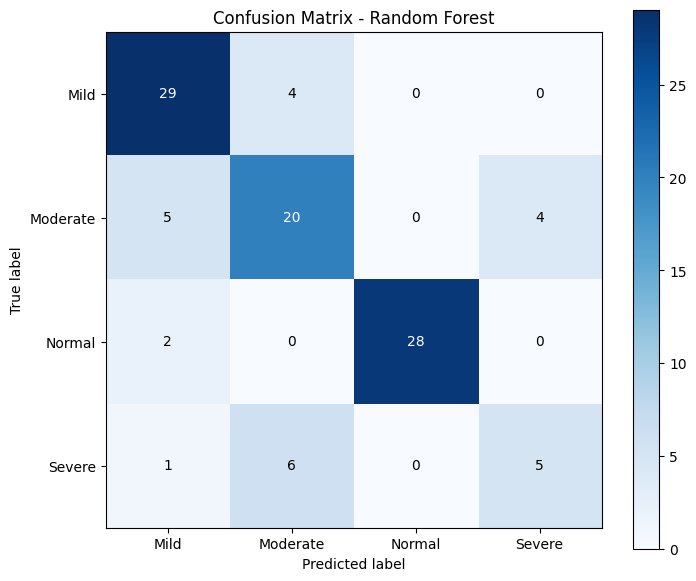

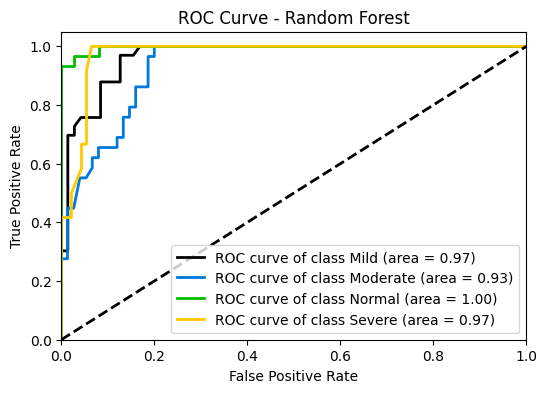

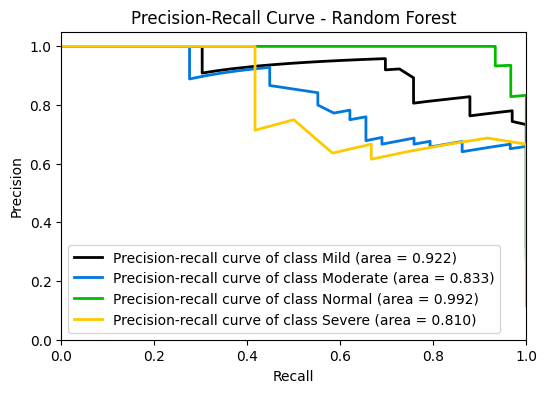

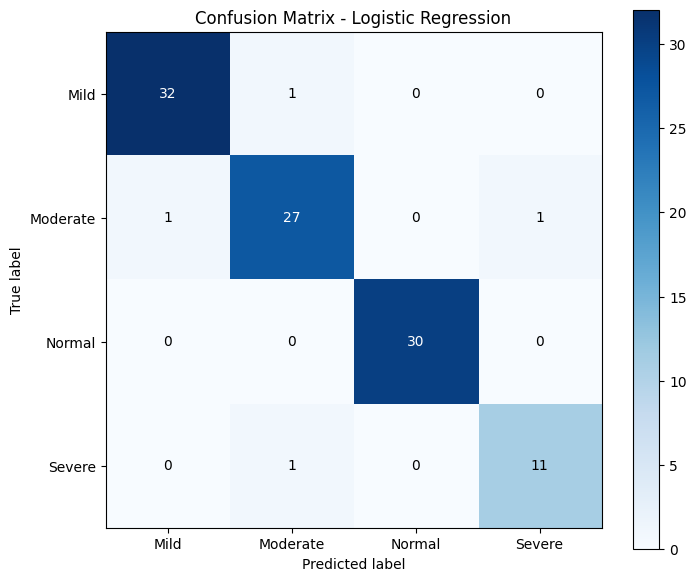

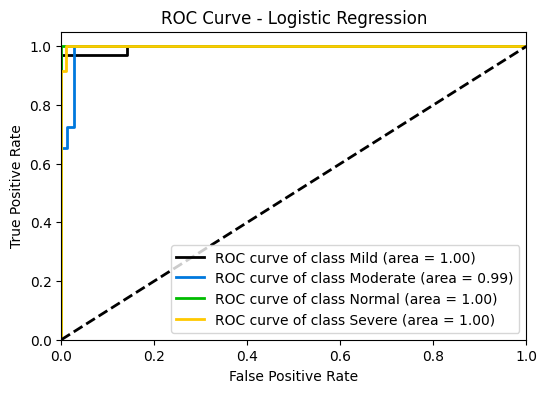

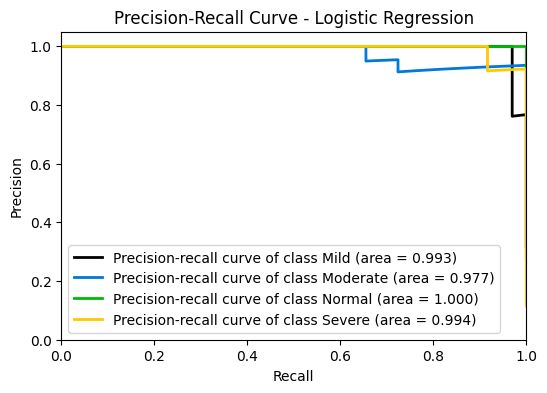

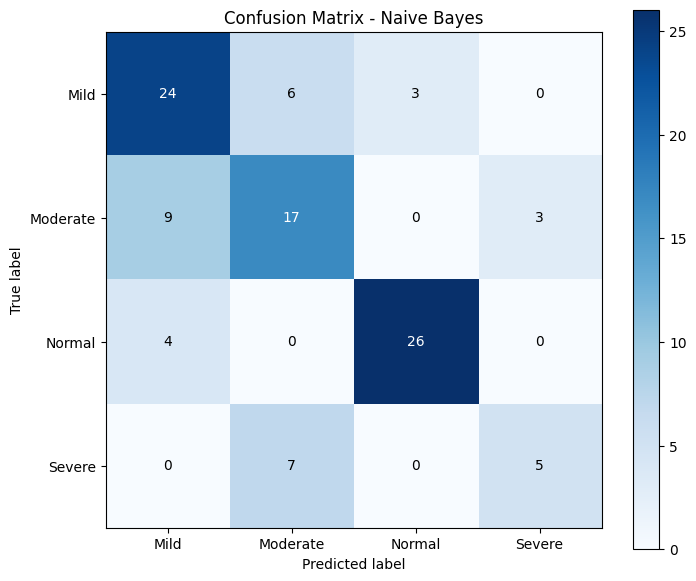

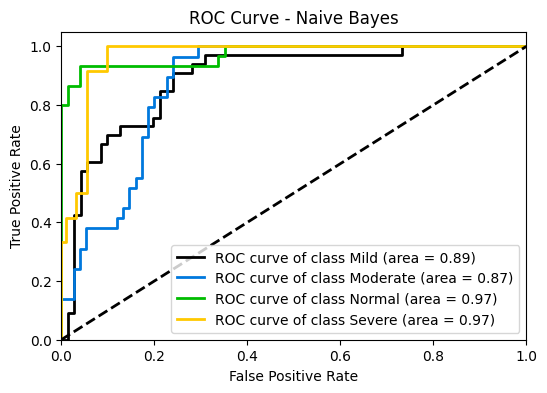

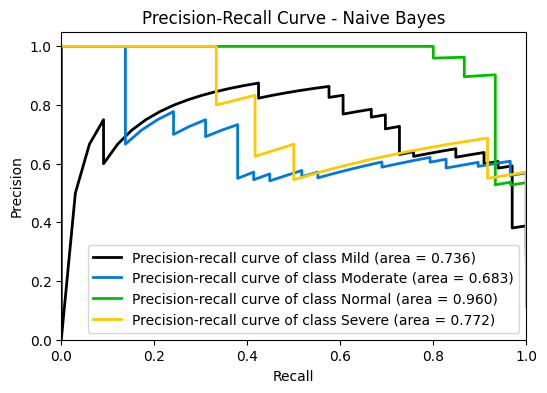

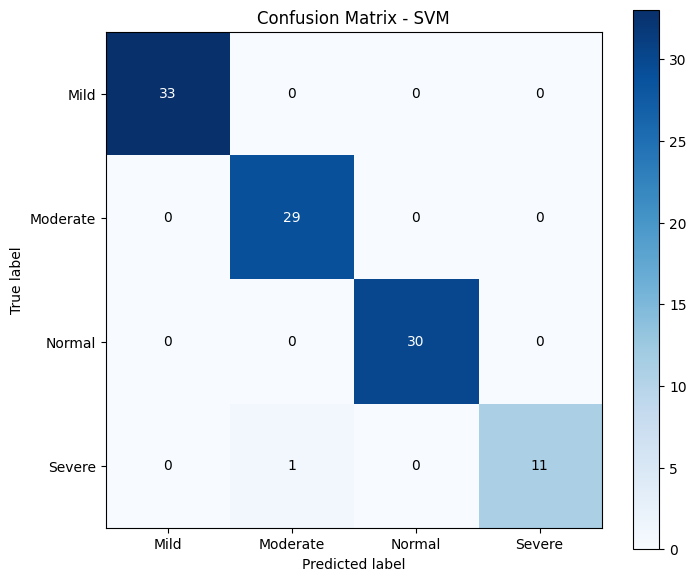

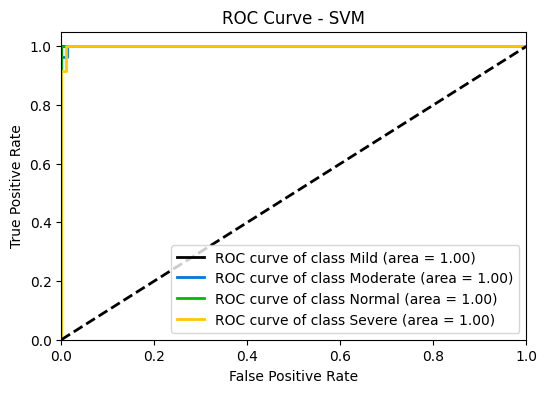

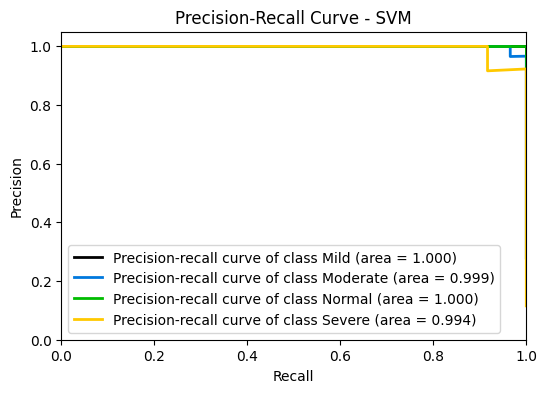

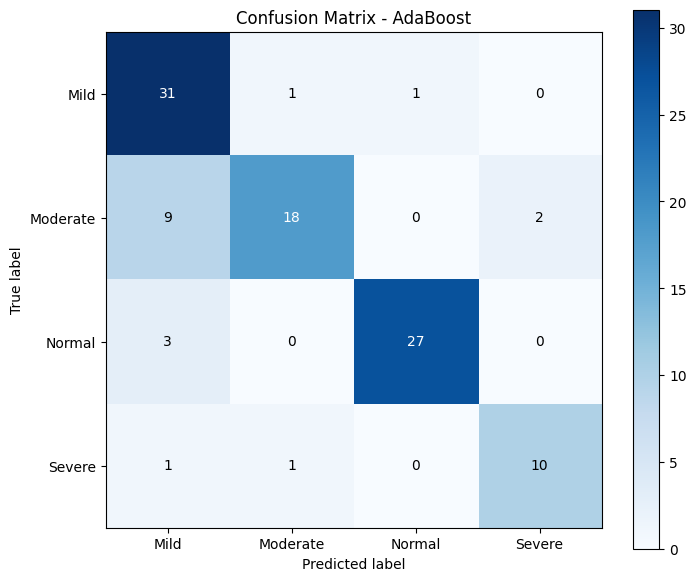

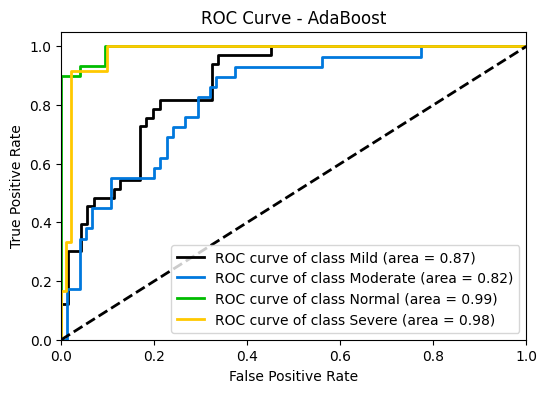

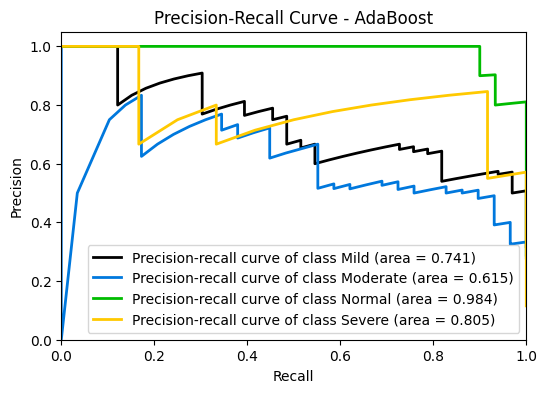

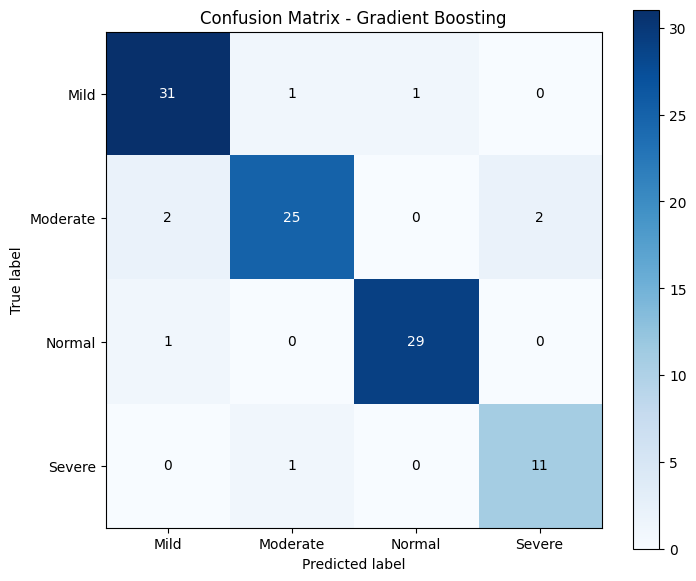

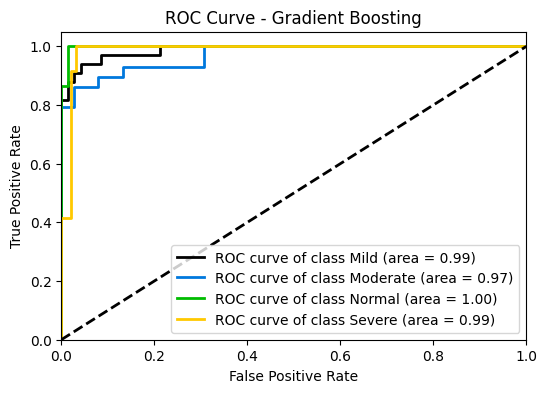

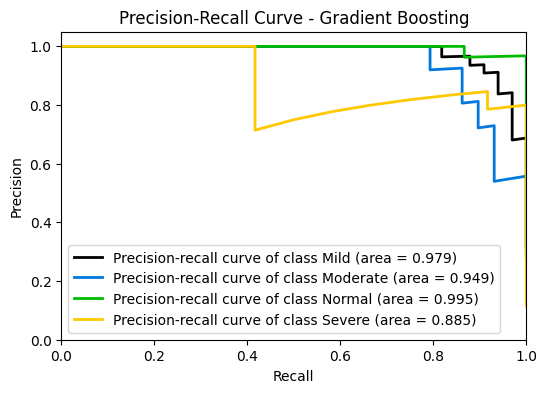

In [25]:
# Evaluating the final results
for name, clf in classifiers.items():
    # Train the best classifier
    clf.fit(X_train, y_train)

    # Predict using the trained classifier
    y_pred = clf.predict(X_test)


    # Plot confusion matrix with classifier name
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8,7), title=f"Confusion Matrix - {name}")

    # Plot ROC curve with classifier name
    y_probas = clf.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas, figsize=(6, 4), plot_micro=False, plot_macro=False, title=f"ROC Curve - {name}")

    # Plot PRC curve with classifier name
    skplt.metrics.plot_precision_recall(y_test, y_probas, figsize=(6, 4), plot_micro=False, title=f"Precision-Recall Curve - {name}")

    print()

# Highlights -

Highest Accuracy -
SVM - 97% -> 97%
LR - 94% -> 94%